## Różnice w LLM

In [1]:
import base64
from openai import OpenAI
from dotenv import load_dotenv
import pandas as pd
import json
import time

load_dotenv()

client = OpenAI()

with open("../../data/document.pdf", "rb") as f:
    data = f.read()

base64_string = base64.b64encode(data).decode("utf-8")

messages = [
    {
      "role": "system",
       "content": """You are an intelligent assistant analyzing company shareholder information. You will be provided with a PDF containing shareholder data for the company. Respond with only JSON code without any additional text or formatting. Avoid also adding markdown format.
Example output:
shareholders": [
   {
       "shareholder_name": "Example company",
       "trade_register_info": "No 12345 Metropolis",
       "address": "Some street 10",
       "birthdate": "null",
       "share_amount": 11250,
       "share_percentage": 45.0
   },
   {
       "shareholder_name": "John Doe",
       "trade_register_info": null,
       "address": "Other street 11",
       "birthdate": "1965-04-12",
       "share_amount": 11250,
       "share_percentage": 45.0
   }
]"""
    },
    {
        "role": "user",
        "content": [
            {
                "type": "file",
                "file": {
                    "filename": "document.pdf",
                    "file_data": f"data:application/pdf;base64,{base64_string}",
                }
            },
            {
                "type": "text",
                "text": "What are shareholders of this company?",
            }
        ],
    },
]


In [2]:
start = time.time()
completion4o = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages
)
time4o = time.time() - start

print(completion4o.usage)

CompletionUsage(completion_tokens=260, prompt_tokens=494, total_tokens=754, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0))


In [3]:
start = time.time()
completion5mini = client.chat.completions.create(
    model="gpt-5-mini",
    messages=messages
)
time5mini = time.time() - start

print(completion5mini.usage)

CompletionUsage(completion_tokens=914, prompt_tokens=1196, total_tokens=2110, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=768, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0))


In [4]:
usage4omini = completion4o.usage
usage5mini = completion5mini.usage

df_compare_models = pd.DataFrame([
    {'time': time4o, 'completion_tokens': usage4omini.completion_tokens, 'prompt_tokens': usage4omini.prompt_tokens, 'total_tokens': usage4omini.total_tokens, 'reasoning_tokens': usage4omini.completion_tokens_details.reasoning_tokens},
    {'time': time5mini, 'completion_tokens': usage5mini.completion_tokens, 'prompt_tokens': usage5mini.prompt_tokens, 'total_tokens': usage5mini.total_tokens, 'reasoning_tokens': usage5mini.completion_tokens_details.reasoning_tokens}
],
index=['gp-4o-mini', 'gpt-5-mini'])
df_compare_models

,time,completion_tokens,prompt_tokens,total_tokens,reasoning_tokens
gp-4o-mini,7.402340,260,494,754,0
gpt-5-mini,15.789109,914,1196,2110,768


<Axes: >

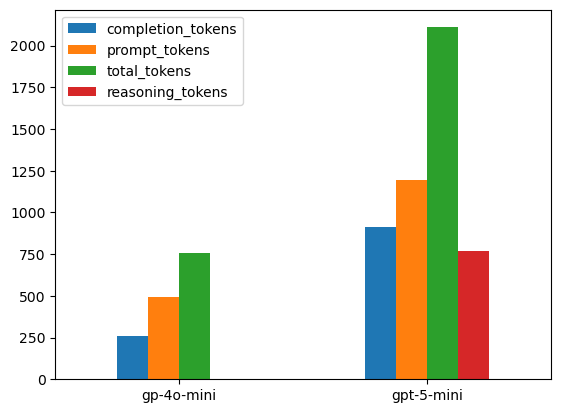

In [5]:
df_compare_models[['completion_tokens', 'prompt_tokens', 'total_tokens', 'reasoning_tokens']].plot.bar(rot=0)

<Axes: >

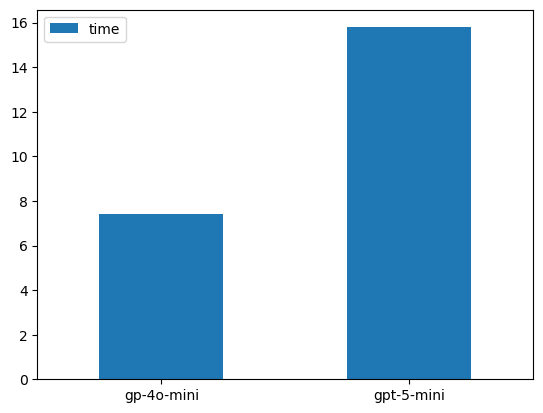

In [6]:
df_compare_models[['time']].plot.bar(rot=0)

In [7]:
data = json.loads(completion4o.choices[0].message.content)['shareholders']
df4omini = pd.DataFrame(data)
df4omini

,shareholder_name,trade_register_info,address,birthdate,share_amount,share_percentage
0,Rom-Bud Pol-Spyra D.O.O.,None,None,None,25000,50.0
1,Jan Kowalski,None,None,1935-09-30,25000,25.0
2,Jan Kowalski,None,None,1935-09-30,25000,25.0
3,Zdzisław Malinowski,None,None,1970-07-28,0,0.0


In [8]:
data = json.loads(completion5mini.choices[0].message.content)['shareholders']
df5mini = pd.DataFrame(data)
df5mini

,shareholder_name,trade_register_info,address,birthdate,share_amount,share_percentage
0,Jan Kowalski,None,None,1955-09-30,20000,80.0
1,Zdzisław Malinowski,None,None,1976-07-28,5000,20.0
